## SINGLE PERIOD MARKOWITZ
__Using the markowitz.py created__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
# Get Environment
from environment import Environment
env = Environment()
# Custom Markowitz
import non_ai.markowitz as markowitz
print("Imports Complete!")

Imports Complete!


In [2]:
# Variables
start_date = "2017-01-01"
end_date = "2020-01-01"
num = 10     # Number of Assets
features = ["Open", "High", "Low", "Close", "Adj Close", "Volume", "Daily Return", "Log Return"]
# Set up Environment
train_start_date, train_end_date, test_start_date, test_end_date, codes = env.get_repo(start_date, end_date, num) 

In [3]:
# Get Train Data
d = env.get_asset_dict(train_start_date, train_end_date, codes, features)

In [4]:
codes = ["BA", "KO", "F", "IBM", "GE", "JPM", "MSFT", "NKE", "WMT", "XOM"]
d["BA"].head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Log Return
Date,,,,,,,,
2017-01-03,156.300003,157.139999,155.210007,156.970001,145.533676,3426100.0,0.008286,0.008252
2017-01-04,157.809998,159.229996,157.809998,158.619995,147.063477,3189800.0,0.010512,0.010457
2017-01-05,158.410004,159.699997,157.399994,158.710007,147.146927,2796000.0,0.000567,0.000567
2017-01-06,158.979996,159.660004,157.889999,159.100006,147.508514,2426000.0,0.002457,0.002454
2017-01-09,159.000000,159.240005,158.169998,158.320007,146.785309,2839400.0,-0.004903,-0.004915


In [5]:
# Initialize
m = markowitz.Markowitz()

# Train
m.Train(d, codes, simulation_num = 100000, balance = 1)

Creating simulations...
Locating portfolio positions...
Getting weights for portfolios located...
Calculating weighted returns...
Calculating sum of weighted returns...
Calculating cumulative returns...
Done!


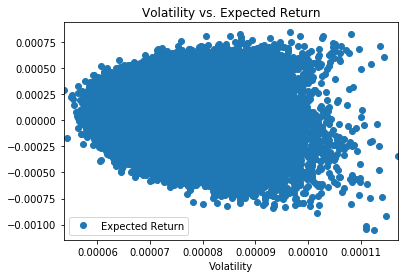

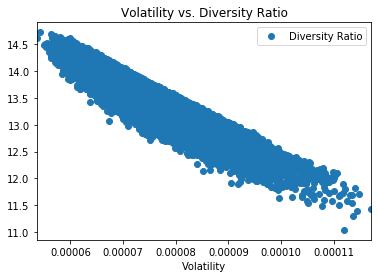

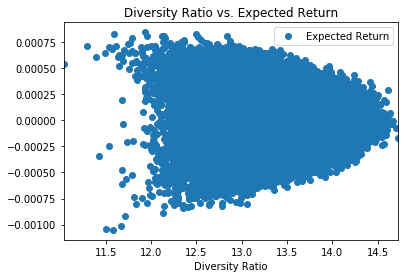

In [6]:
m.PlotSimulations()

#### Plot Portfolio Positions:
- Sharpe: Blue 
- Maximum Return: Green
- Maximum Diversity: Red
- Minimum Volatility: Yellow

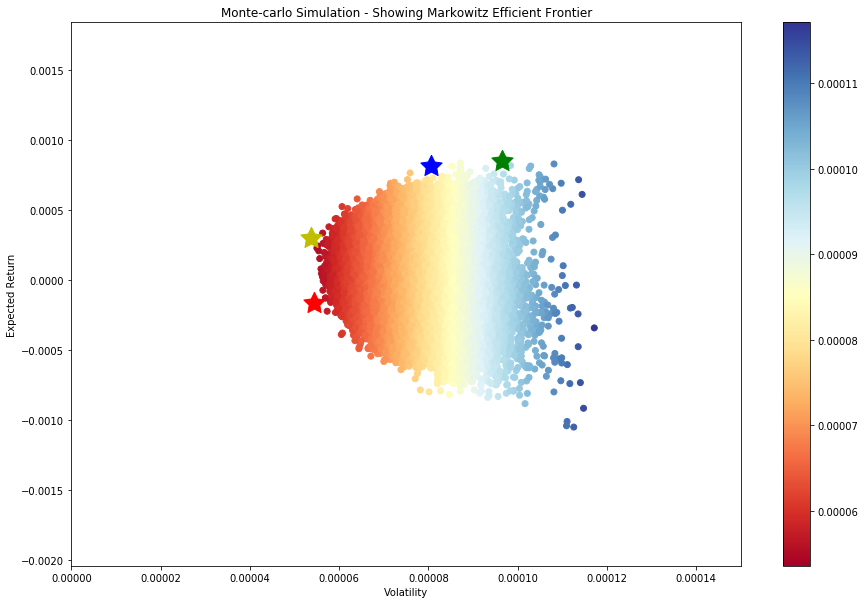

In [7]:
m.PlotPortfolioPositions()

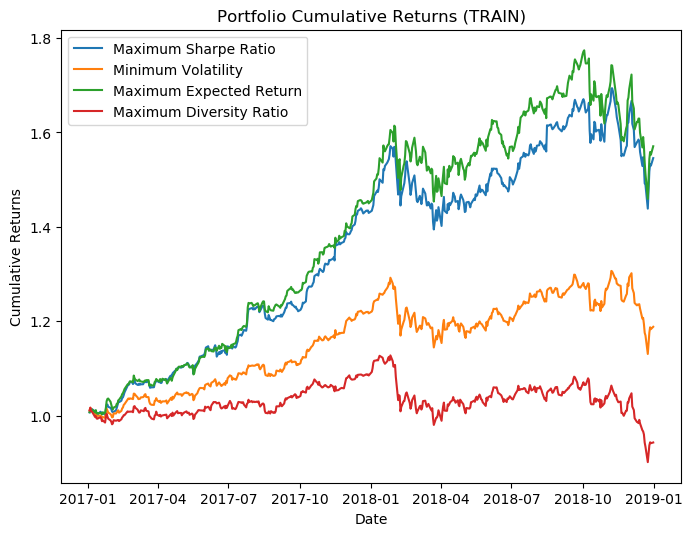

In [8]:
m.PlotCumulativeReturns()

In [9]:
m.ReturnsResultsTable()
m.returns_results_table.head()

,Portfolio,Average Daily Yield,Sharpe Ratio,Maximum Drawdown
0,Maximum Sharpe Ratio,0.091,1.607,7.754
1,Minimum Volatility,0.037,0.805,5.145
2,Maximum Expected Return,0.095,1.534,7.568
3,Maximum Diversity Ratio,-0.009,-0.195,5.148


In [10]:
# End of Train, Start of TEST! ===================================

# Get Test Data
test_d = env.get_asset_dict(test_start_date, test_end_date, codes, features)

test_d['BA'].head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Log Return
Date,,,,,,,,
2019-01-02,316.190002,323.950012,313.709991,323.809998,314.645142,3292200.0,0.004062,0.004054
2019-01-03,319.489990,319.739990,309.399994,310.899994,302.100555,5705600.0,-0.039869,-0.040686
2019-01-04,316.690002,328.440002,316.079987,327.079987,317.822601,4448800.0,0.052042,0.050733
2019-01-07,330.519989,330.690002,323.350006,328.109985,318.823395,4030300.0,0.003149,0.003144
2019-01-08,334.109985,341.250000,332.649994,340.529999,330.891937,4736500.0,0.037853,0.037155


In [11]:
m.Test(test_d, balance = 1)

Calculating returns...
Calculating cumulative returns...
Done!


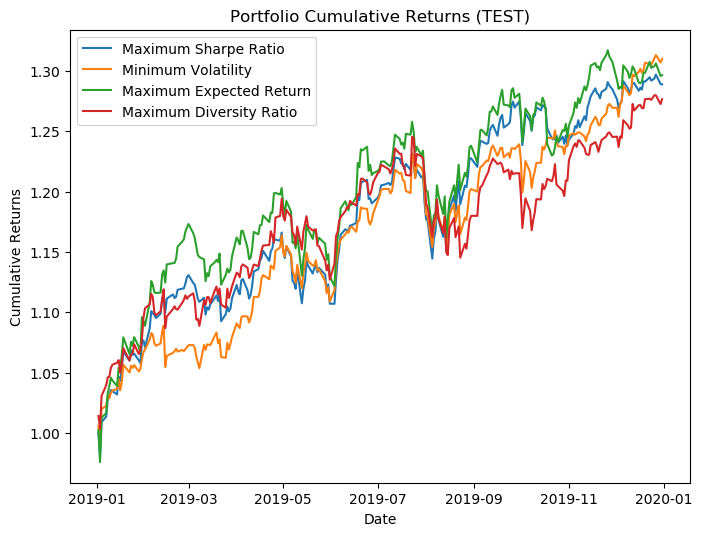

In [12]:
m.PlotCumulativeReturns(plot = "Test")

In [13]:
m.ReturnsResultsTable(plot = 'Test')
m.returns_results_table.head()

,Portfolio,Average Daily Yield,Sharpe Ratio,Maximum Drawdown
0,Maximum Sharpe Ratio,0.104,2.076,66.331
1,Minimum Volatility,0.110,2.332,6.588
2,Maximum Expected Return,0.107,1.843,13.680
3,Maximum Diversity Ratio,0.100,1.954,3.047


In [14]:
# Weighted Returns for the Sharpe Ratio Portfolio
m.weighted_returns_sharpe.head()

,BA,KO,F,IBM,GE,JPM,MSFT,NKE,WMT,XOM
Date,,,,,,,,,,
2017-01-03,0.001648,0.001396,0.000783,0.000135,2.986359e-06,5.639089e-05,0.001136,0.003162,-0.001795,0.000107
2017-01-04,0.002091,-0.000611,0.000951,0.000231,3.308833e-07,9.547077e-06,-0.000718,0.002930,0.001571,-0.000169
2017-01-05,0.000113,0.000409,-0.000627,-0.000062,-5.953806e-06,-4.764850e-05,0.000000,-0.000026,0.000586,-0.000230
2017-01-06,0.000489,-0.000041,-0.000016,0.000092,2.993795e-06,6.004350e-07,0.001391,0.002239,-0.003703,-0.000009
2017-01-09,-0.000975,-0.001713,-0.000210,-0.000207,-4.975524e-06,3.606218e-06,-0.000511,-0.001374,0.001778,-0.000254


In [15]:
# Sharpe Ratio Portfolio Returns
len(m.port_ret_test_sharpe)

252

-------------------------
## MULTI PERIOD MARKOWITZ

In [16]:
from datetime import datetime, timedelta

In [17]:
lookback_size = 200 #720 # days
window_size = 20 # Days before rebalancing
simulation_number = 5000
actual_start_date = test_start_date - timedelta(days=lookback_size)
actual_end_date = test_end_date

print("Actual Start Date: " + str(actual_start_date))
print("Actual End Date: " + str(actual_end_date))

# Get Data
df = env.get_asset_dict(actual_start_date, actual_end_date, codes, features)

Actual Start Date: 2018-06-16 00:00:00
Actual End Date: 2019-12-31 00:00:00


#### Transaction Costs
Transaction Cost may be a percentage or fixed. In our experiment we'll be using a fixed transaction cost. 
The asset weight difference is summed up and multiplied by this transaction_cost_fixed. The return is reduced with this calculated transaction cost.

https://www.stockbrokers.com/guides/features-fees#stocktradingfees

In [18]:
transaction_cost_fixed = 0.005

In [19]:
df['BA'].last_valid_index()

Timestamp('2019-12-31 00:00:00')

In [20]:
# Custom Markowitz Multi Period
import non_ai.multi_period_markowitz as markowitz_mp

In [21]:
# Initialize
mpm = markowitz_mp.MultiPeriodMarkowitz()

In [22]:
codes

['BA', 'KO', 'F', 'IBM', 'GE', 'JPM', 'MSFT', 'NKE', 'WMT', 'XOM']

In [23]:
mpm.Main(df, codes, actual_start_date, actual_end_date, lookback_size, window_size, simulation_num=simulation_number, balance=1, tc_fixed = transaction_cost_fixed)

BA Initial Weight: 0.08430637984643179
KO Initial Weight: 0.18073841521665462
F Initial Weight: 0.006935395552277893
IBM Initial Weight: 0.005699430767252067
GE Initial Weight: 0.018492899964979596
JPM Initial Weight: 0.10173132122033804
MSFT Initial Weight: 0.12088442210482621
NKE Initial Weight: 0.1987185424043581
WMT Initial Weight: 0.18407150198145467
XOM Initial Weight: 0.0984216909414271
Asset: BA
Weight Before: 0.08430637984643179
Weight Now: 0.0924014652216121
Date
2019-01-23    0.000183
Name: Daily Return, dtype: float64
Date
2019-01-23    0.000143
Name: Daily Return, dtype: float64
Asset: KO
Weight Before: 0.18073841521665462
Weight Now: 0.252362451557275
Date
2019-01-23    0.002909
Name: Daily Return, dtype: float64
Date
2019-01-23    0.00255
Name: Daily Return, dtype: float64
Asset: F
Weight Before: 0.006935395552277893
Weight Now: 0.05476092282322364
Date
2019-01-23   -0.001031
Name: Daily Return, dtype: float64
Date
2019-01-23   -0.00127
Name: Daily Return, dtype: float64

Asset: BA
Weight Before: 0.36988243821106465
Weight Now: 0.1862032189322708
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: KO
Weight Before: 0.1780406551852442
Weight Now: 0.19396238477759575
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: F
Weight Before: 0.0276236671567685
Weight Now: 0.02216390259882231
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: IBM
Weight Before: 0.041433381601541704
Weight Now: 0.021120950332255854
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: GE
Weight Before: 0.018295005672243438
Weight Now: 0.021421497941539164
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: JPM
Weight Before: 0.05121962658131429
Weight Now: 0.00808158000931021
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Da

Asset: BA
Weight Before: 0.02724188751491935
Weight Now: 0.05745562248054704
Date
2019-06-12   -0.000378
Name: Daily Return, dtype: float64
Date
2019-06-12   -0.000529
Name: Daily Return, dtype: float64
Asset: KO
Weight Before: 0.20658313644679754
Weight Now: 0.25573117750737173
Date
2019-06-12    0.001544
Name: Daily Return, dtype: float64
Date
2019-06-12    0.001299
Name: Daily Return, dtype: float64
Asset: F
Weight Before: 0.030079737705971252
Weight Now: 0.07174059862295773
Date
2019-06-12   -0.000506
Name: Daily Return, dtype: float64
Date
2019-06-12   -0.000715
Name: Daily Return, dtype: float64
Asset: IBM
Weight Before: 0.22243529485166946
Weight Now: 0.06163493878321394
Date
2019-06-12   -0.00049
Name: Daily Return, dtype: float64
Date
2019-06-12   -0.001294
Name: Daily Return, dtype: float64
Asset: GE
Weight Before: 0.04796680747623648
Weight Now: 0.04271873969093388
Date
2019-06-12    0.000675
Name: Daily Return, dtype: float64
Date
2019-06-12    0.000649
Name: Daily Return, 

Asset: BA
Weight Before: 0.0024919984820357417
Weight Now: 0.018441403232519502
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: KO
Weight Before: 0.18995769002200943
Weight Now: 0.18833029536251297
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: F
Weight Before: 0.05141521190633021
Weight Now: 0.09235236559644765
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: IBM
Weight Before: 0.10944238069729706
Weight Now: 0.06982378251072659
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: GE
Weight Before: 0.023276719153509855
Weight Now: 0.005026007826083235
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: JPM
Weight Before: 0.13531373010698827
Weight Now: 0.1741499794526856
Series([], Name: Daily Return, dtype: float64)
Series([], Name:

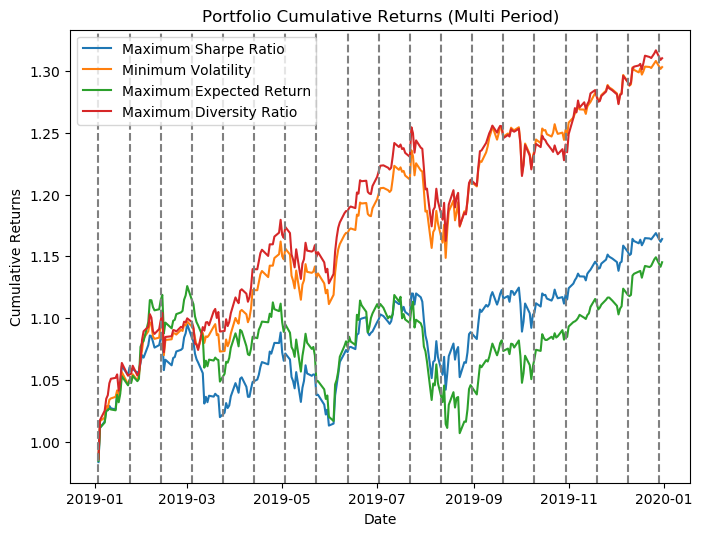

In [24]:
mpm.PlotCumulativeReturns()

In [25]:
mpm.ReturnsResultsTable()
mpm.returns_results_table.head()

,Portfolio,Average Daily Yield,Sharpe Ratio,Maximum Drawdown
0,Maximum Sharpe Ratio,0.064,1.279,1.985
1,Minimum Volatility,0.108,2.307,1.924
2,Maximum Expected Return,0.058,1.039,2.091
3,Maximum Diversity Ratio,0.111,2.274,1.907


--------------------
### What about if we had NO TRANSACTION COST?

In [26]:
# Initialize and Test with no transaction costs
mpm_ntc = markowitz_mp.MultiPeriodMarkowitz()
mpm_ntc.Main(df, codes, actual_start_date, actual_end_date, lookback_size, window_size, simulation_num=simulation_number, balance=1)

BA Initial Weight: 0.08430637984643179
KO Initial Weight: 0.18073841521665462
F Initial Weight: 0.006935395552277893
IBM Initial Weight: 0.005699430767252067
GE Initial Weight: 0.018492899964979596
JPM Initial Weight: 0.10173132122033804
MSFT Initial Weight: 0.12088442210482621
NKE Initial Weight: 0.1987185424043581
WMT Initial Weight: 0.18407150198145467
XOM Initial Weight: 0.0984216909414271
Asset: BA
Weight Before: 0.08430637984643179
Weight Now: 0.0924014652216121
Date
2019-01-23    0.000183
Name: Daily Return, dtype: float64
Date
2019-01-23    0.000183
Name: Daily Return, dtype: float64
Asset: KO
Weight Before: 0.18073841521665462
Weight Now: 0.252362451557275
Date
2019-01-23    0.002909
Name: Daily Return, dtype: float64
Date
2019-01-23    0.002909
Name: Daily Return, dtype: float64
Asset: F
Weight Before: 0.006935395552277893
Weight Now: 0.05476092282322364
Date
2019-01-23   -0.001031
Name: Daily Return, dtype: float64
Date
2019-01-23   -0.001031
Name: Daily Return, dtype: float

Asset: BA
Weight Before: 0.36988243821106465
Weight Now: 0.1862032189322708
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: KO
Weight Before: 0.1780406551852442
Weight Now: 0.19396238477759575
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: F
Weight Before: 0.0276236671567685
Weight Now: 0.02216390259882231
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: IBM
Weight Before: 0.041433381601541704
Weight Now: 0.021120950332255854
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: GE
Weight Before: 0.018295005672243438
Weight Now: 0.021421497941539164
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: JPM
Weight Before: 0.05121962658131429
Weight Now: 0.00808158000931021
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Da

Asset: BA
Weight Before: 0.02724188751491935
Weight Now: 0.05745562248054704
Date
2019-06-12   -0.000378
Name: Daily Return, dtype: float64
Date
2019-06-12   -0.000378
Name: Daily Return, dtype: float64
Asset: KO
Weight Before: 0.20658313644679754
Weight Now: 0.25573117750737173
Date
2019-06-12    0.001544
Name: Daily Return, dtype: float64
Date
2019-06-12    0.001544
Name: Daily Return, dtype: float64
Asset: F
Weight Before: 0.030079737705971252
Weight Now: 0.07174059862295773
Date
2019-06-12   -0.000506
Name: Daily Return, dtype: float64
Date
2019-06-12   -0.000506
Name: Daily Return, dtype: float64
Asset: IBM
Weight Before: 0.22243529485166946
Weight Now: 0.06163493878321394
Date
2019-06-12   -0.00049
Name: Daily Return, dtype: float64
Date
2019-06-12   -0.00049
Name: Daily Return, dtype: float64
Asset: GE
Weight Before: 0.04796680747623648
Weight Now: 0.04271873969093388
Date
2019-06-12    0.000675
Name: Daily Return, dtype: float64
Date
2019-06-12    0.000675
Name: Daily Return, d

Asset: BA
Weight Before: 0.0024919984820357417
Weight Now: 0.018441403232519502
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: KO
Weight Before: 0.18995769002200943
Weight Now: 0.18833029536251297
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: F
Weight Before: 0.05141521190633021
Weight Now: 0.09235236559644765
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: IBM
Weight Before: 0.10944238069729706
Weight Now: 0.06982378251072659
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: GE
Weight Before: 0.023276719153509855
Weight Now: 0.005026007826083235
Series([], Name: Daily Return, dtype: float64)
Series([], Name: Daily Return, dtype: float64)
Asset: JPM
Weight Before: 0.13531373010698827
Weight Now: 0.1741499794526856
Series([], Name: Daily Return, dtype: float64)
Series([], Name:

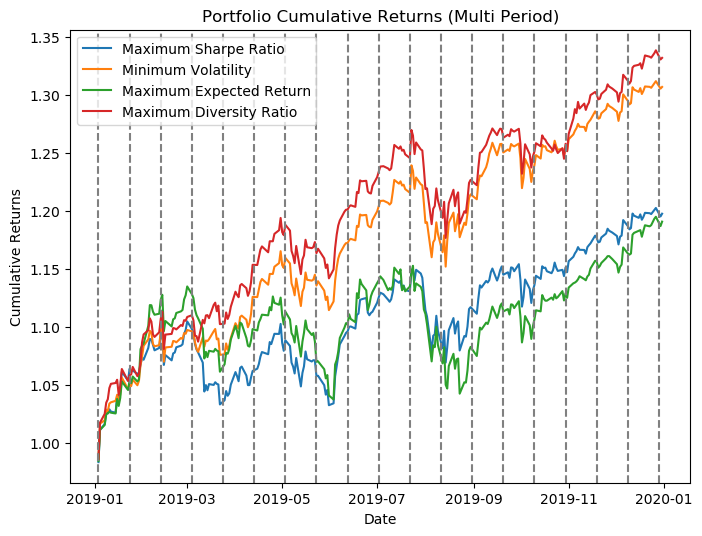

In [27]:
mpm_ntc.PlotCumulativeReturns()

In [28]:
mpm_ntc.ReturnsResultsTable()
mpm_ntc.returns_results_table.head()

,Portfolio,Average Daily Yield,Sharpe Ratio,Maximum Drawdown
0,Maximum Sharpe Ratio,0.075,1.506,1.985
1,Minimum Volatility,0.109,2.332,1.924
2,Maximum Expected Return,0.073,1.320,2.091
3,Maximum Diversity Ratio,0.117,2.407,1.907


--------------------
### Let's Plot these against eachother!

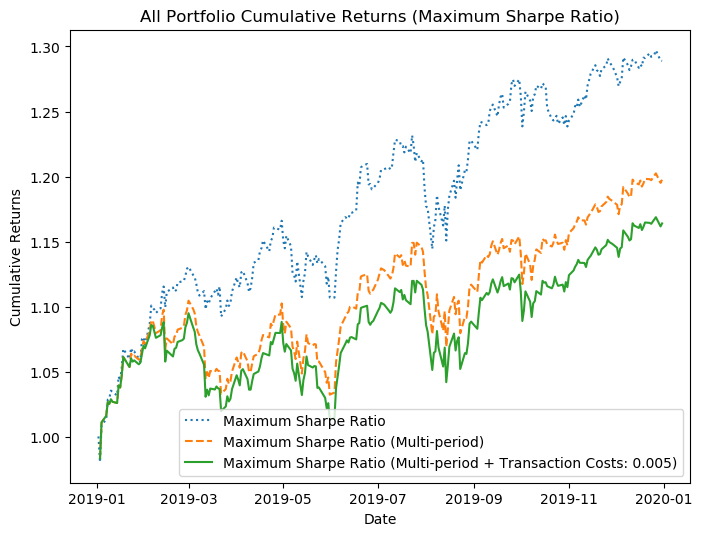

In [29]:
# Maximum Sharpe Ratio
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(m.cumulative_ret_test_sharpe, label="Maximum Sharpe Ratio", linestyle=':')
plt.plot(mpm_ntc.cumulative_ret_sharpe, label="Maximum Sharpe Ratio (Multi-period)", linestyle='--')
plt.plot(mpm.cumulative_ret_sharpe, label="Maximum Sharpe Ratio (Multi-period + Transaction Costs: "
         + str(transaction_cost_fixed) + ")")

plt.title('All Portfolio Cumulative Returns (Maximum Sharpe Ratio)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

plt.legend()
plt.show()

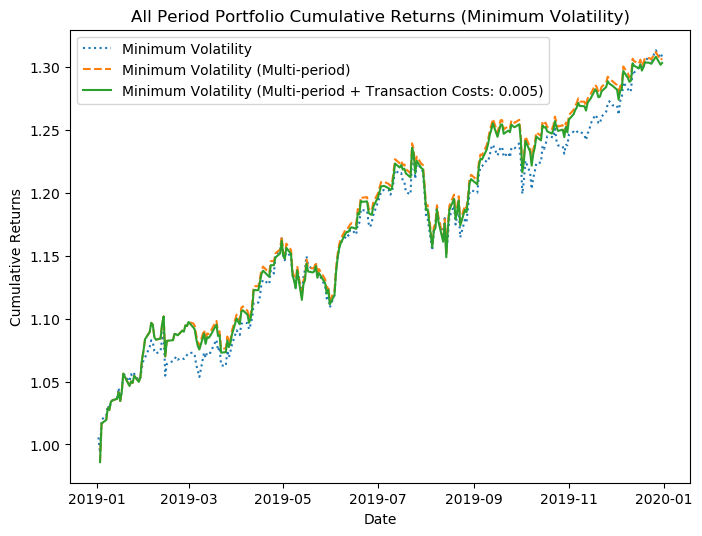

In [30]:
# Minimum Volatility
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(m.cumulative_ret_test_min_vol, label="Minimum Volatility", linestyle=':')
plt.plot(mpm_ntc.cumulative_ret_min_vol, label="Minimum Volatility (Multi-period)", linestyle='--')
plt.plot(mpm.cumulative_ret_min_vol, label="Minimum Volatility (Multi-period + Transaction Costs: " \
         + str(transaction_cost_fixed) + ")")

plt.title('All Period Portfolio Cumulative Returns (Minimum Volatility)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

plt.legend()
plt.show()

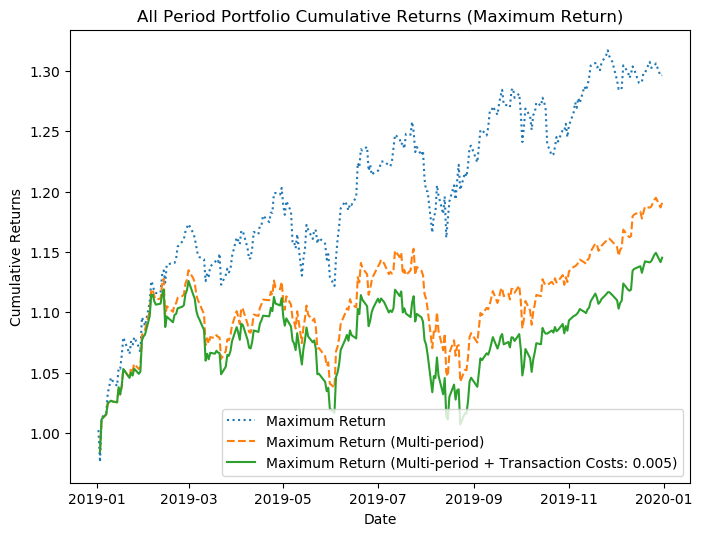

In [31]:
# Maximum Return
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(m.cumulative_ret_test_max_ret, label="Maximum Return", linestyle=':')
plt.plot(mpm_ntc.cumulative_ret_max_ret, label="Maximum Return (Multi-period)", linestyle='--')
plt.plot(mpm.cumulative_ret_max_ret, label="Maximum Return (Multi-period + Transaction Costs: " \
         + str(transaction_cost_fixed) + ")")

plt.title('All Period Portfolio Cumulative Returns (Maximum Return)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

plt.legend()
plt.show()

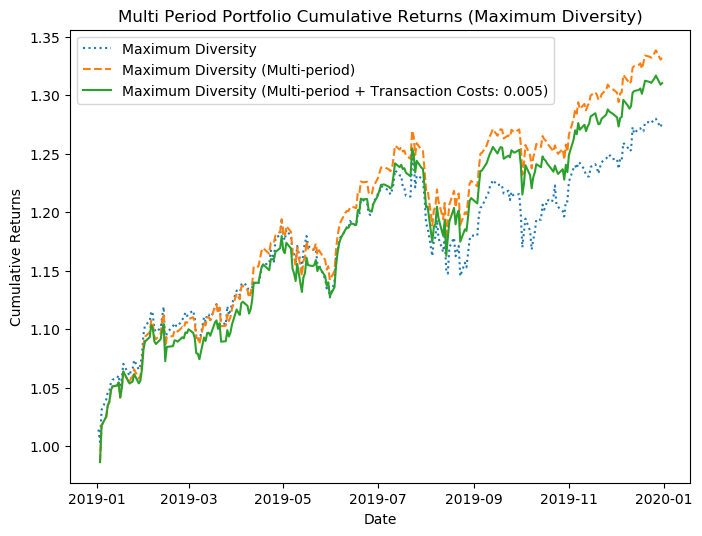

In [32]:
# Maximum Diversity
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(m.cumulative_ret_test_max_div, label="Maximum Diversity", linestyle=':')
plt.plot(mpm_ntc.cumulative_ret_max_div, label="Maximum Diversity (Multi-period)", linestyle='--')
plt.plot(mpm.cumulative_ret_max_div, label="Maximum Diversity (Multi-period + Transaction Costs: " + str(transaction_cost_fixed) + ")")

plt.title('Multi Period Portfolio Cumulative Returns (Maximum Diversity)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

plt.legend()
plt.show()